# Chapitre 9

## 9.1 Définir une objectif Mesurable 

### 9.1.1 Objectif
Prédire si une personne et inféctée en fonction des données cliniques disponibles.

### 9.1.2 Métrique
F1 -> 50% et Recal -> 70%

## 9.2 EDA(Exploratory Data Analysis) 
Comprendre au maximum les données dont on dispose pour déninir une stratègie de modélisation

In [423]:
#Bibliotèque n'écessaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [424]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

ds_covid_origin = pd.read_excel('src/datasets/covid.xlsx')
pd.options.display.max_rows

111

In [425]:
ds_covid_origin.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

### 9.2.1 Analyse De La Forme

1. Identification de la Target -  'SARS-Cov-2 exam result'.
2. Nombre de ligne et de colonnes -  (5644, 111)
3. Types de variables -  (70: Quantitatives, 41: Qualitatives)
4. Identification des valeurs manquantes - On distingue 3 groupe de densité de NaN dans le dataset: 
- * 0% de valeurs manquantes.
- * 76% de valeurs manquantes (Test Viral).
- * 89% de valeurs manquantes (Taux Sanguin).


### 9.2.1 Analyse Profonde

1. Visualisation de la target (Histogramme/ boxplot) - Les ne sont pas equilibré d'ou la nécessité de calculé le Recall, Précision, Sensibilité.
 * 10% taux positifs.
 * 90% taux négatifs.
2. Comprehenssion des differentes variables (Internet).
3. Visualisation des relations features-target.


In [426]:
ds_covid = ds_covid_origin.copy()
#taille des données
ds_covid.shape

(5644, 111)

In [427]:
ds_covid.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

Pour la visualisation des valeurs manquantes j'utilise heatmap et non pas le tableaux car la dataset est volumineuse.
Heatmap nous permet de voir et comprendre la distribution des valeurs manquante dans notre tableau.

<AxesSubplot:>

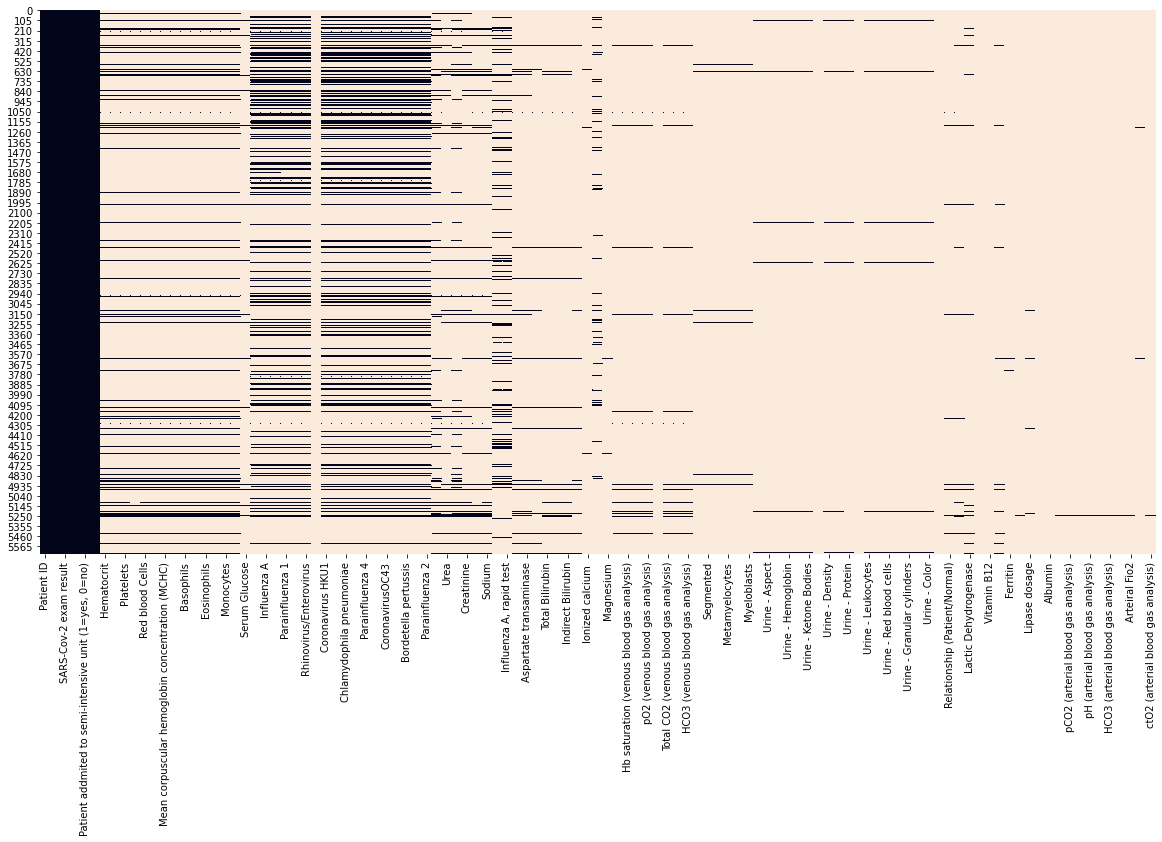

In [428]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(ds_covid.isna(), cbar=False)


In [429]:
#Voir Le Pourcentages des valeurs manquantes
ds_covid.isna().sum().sum() / (ds_covid.shape[0]*ds_covid.shape[1])

0.8806003026414082

On remarque qu'il ya **88%** de valeurs manquantes dans ce dataset.

Mantenant Regardant le pourcentage de valeurs manquantes de chanque variable: 

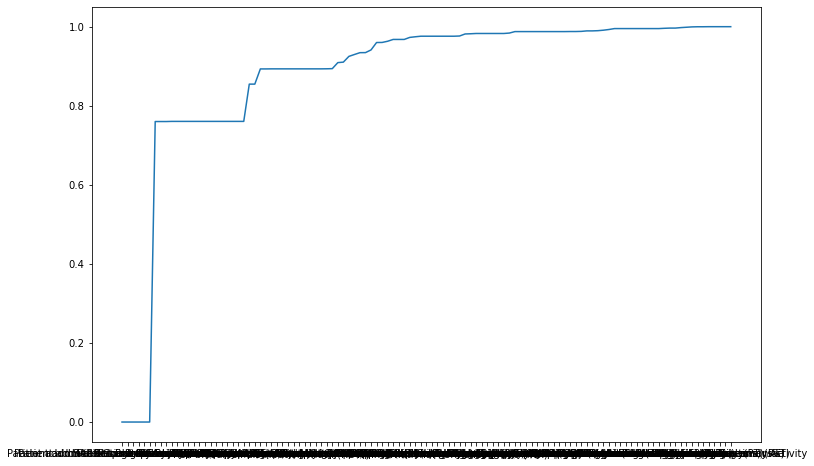

In [430]:
plt.figure(figsize=(12,8))
plt.plot((ds_covid.isna().sum()/ds_covid.shape[0]).sort_values(ascending = True))
plt.show()

In [431]:
(ds_covid.isna().sum()/ds_covid.shape[0]).sort_values(ascending = True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [432]:
#suppriper tout les colonnes qui ont un taux de valeur nan supperieur a 0.9
ds_covid = ds_covid.drop( ds_covid.columns[(ds_covid.isna().sum()/ds_covid.shape[0]) > 0.9 ], axis=1)
#cette colonne ne sert a rien dans notre etude
ds_covid = ds_covid.drop('Patient ID', axis=1)
#Affichage du nouveau dataframe
ds_covid.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

### Comprendre Target

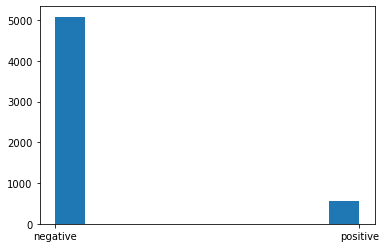

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [433]:
plt.hist(ds_covid['SARS-Cov-2 exam result'])
plt.show()
ds_covid['SARS-Cov-2 exam result'].value_counts()

On remarque que il exist deux valeurs posibles pour la variable Target

In [434]:
negative_count = ds_covid['SARS-Cov-2 exam result'].value_counts()['negative']
positive_count = ds_covid['SARS-Cov-2 exam result'].value_counts()['positive']
(pourc_positive, pour_negative) = (positive_count/(positive_count+negative_count), negative_count/(positive_count+negative_count))
(pourc_positive, pour_negative)

(0.09886605244507442, 0.9011339475549256)

Le pourcenage des cas positive est de 10% , parcontre le pourcentage de nétagive est de 90%.

- **Conclusion:**

Les valeurs de la target ne sont pas equilibré d'ou la nécessité de calculé le Recall, Précision, Sensibilité.

### Comprendre les variables

**Variable Quantitatives**

Pour comprendre les variables numérique la meilleur facon et de les affichées sous formes d'histograme et courbes - distribution

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

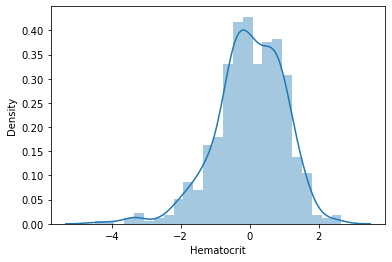

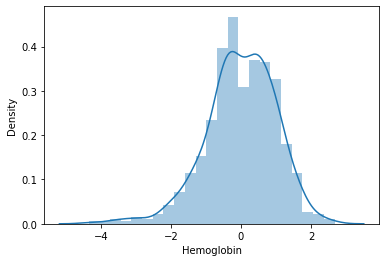

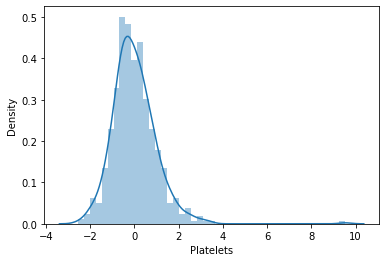

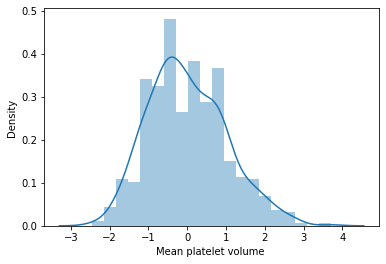

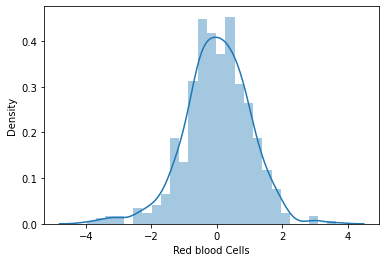

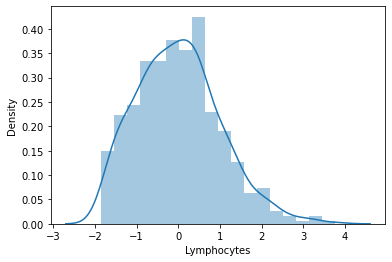

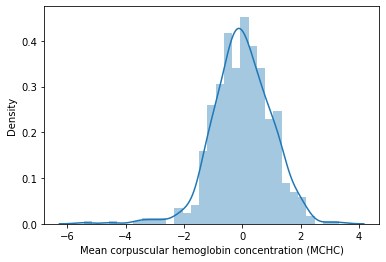

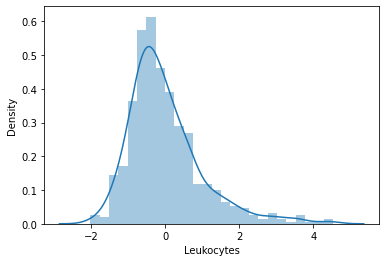

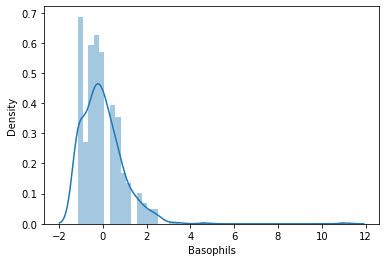

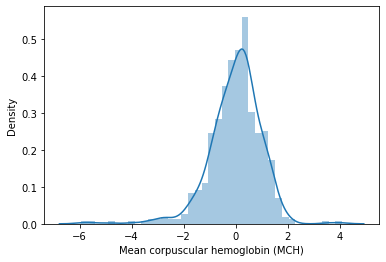

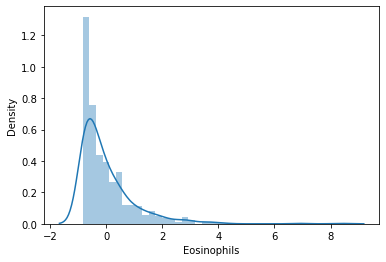

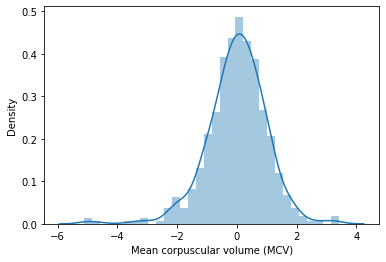

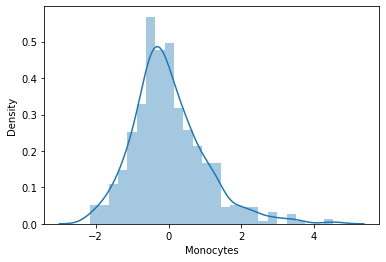

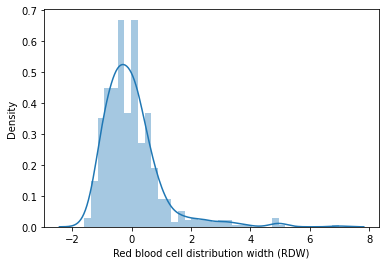

In [435]:
#Affiche la distribution des variables de type plot
for column in ds_covid.select_dtypes('float'):
    plt.figure()
    sns.distplot(ds_covid[column])

On Remarque que la majorité des variables on etait standardisé. La plupart suivent la loi normale.

Passont maintenant aux variables de types entiers.

In [436]:
ds_covid.columns[ds_covid.dtypes=='int64']

Index(['Patient age quantile',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)'],
      dtype='object')

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

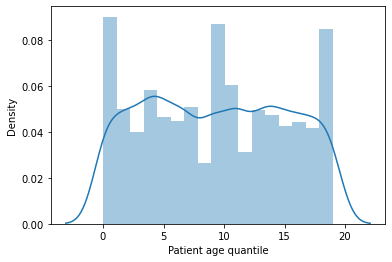

In [437]:
sns.distplot(ds_covid['Patient age quantile'])

- Sanchant que 0 jusqu'a 20 sont des catégorie qui Represente :
  
| Catégorie         |  0              | 1               | ...        |19        |
| :---------------: |:---------------:|:---------------:|:----------:|:----------:|
| Age   (ans)            | [ 0 , 5 [       |  [ 5 , 10 [     | ...        | [ 95 , 100 [|



**Variables Qualitatives**

Un des facons d'affiché les valeurs non numérique est le camembert

0.5672890689604336
0.6527942957778319
0.688306305468146
0.6266825239467186
0.7039687333410451
0.6600360635040111
0.31066673670474054
0.6861864622165313
0.6966466217015395
0.6976926376500403
0.693508573856037
0.6872324781650321
0.6976926376500403
0.698738653598541
0.6045972182334681
0.7050147492895459
0.6924625579075362
nan
0.6225988975813259
0.6174249455238635


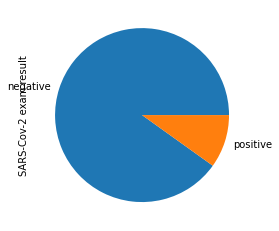

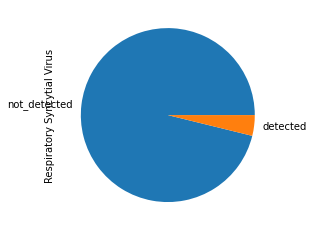

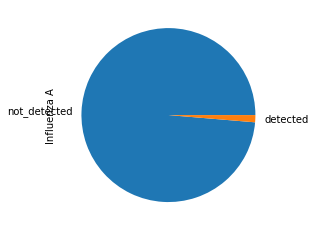

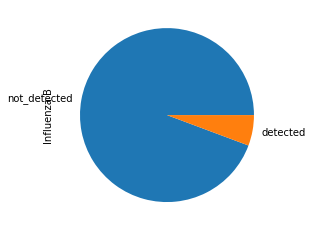

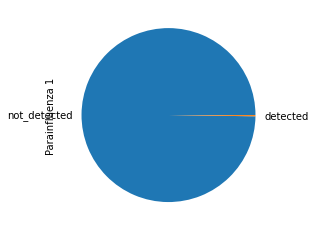

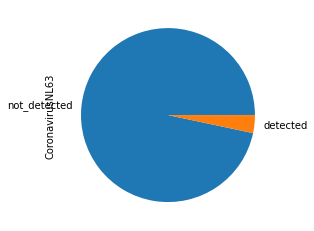

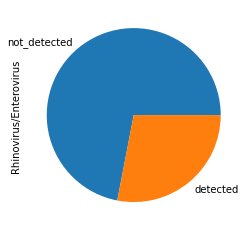

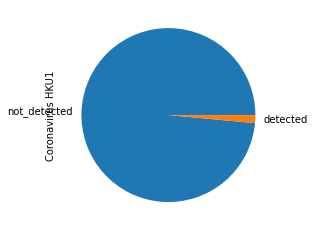

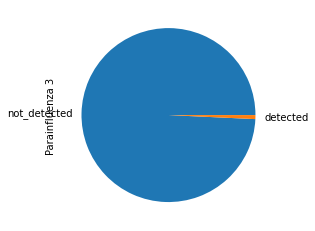

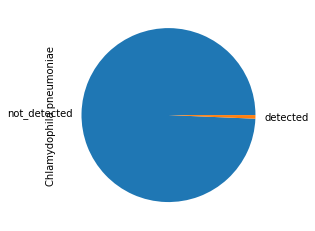

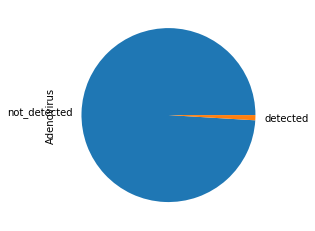

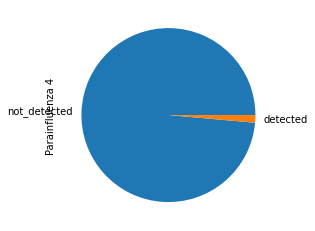

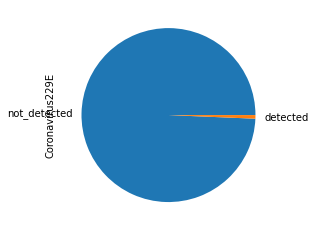

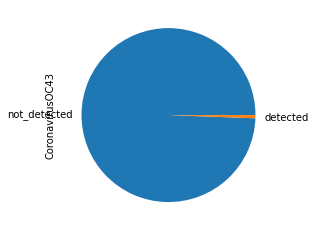

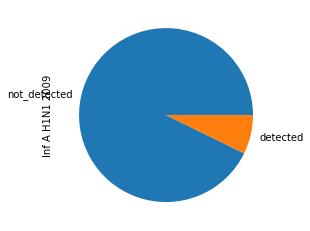

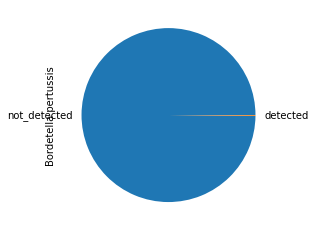

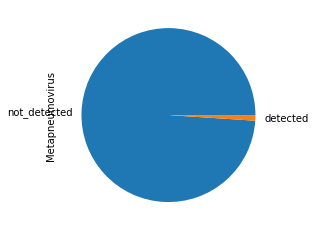

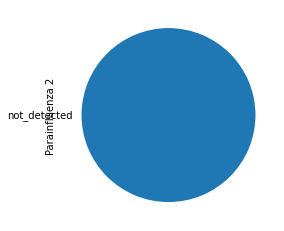

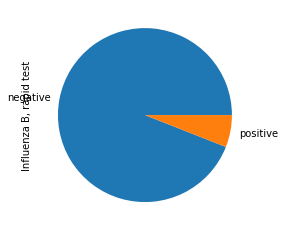

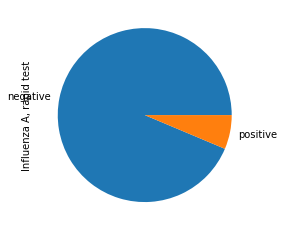

In [438]:
for column in ds_covid.select_dtypes('object'):
    plt.figure()
    ds_covid[column].value_counts().plot.pie()
    print(f"{ds_covid[column].value_counts(normalize= True).std()}")


- On remarque que la variable *'Rhinovirus/Enterovirus'* est tres importante car elle a autant de valeur positive que de valeur négative. 
- Par contre la variable *'Bordetella pertussis'* est inutile car elle n'a pratiquement qu'une seul valeur.

### Relation Target / variables
Création de sous ensemble de variable négative et positive

In [439]:
ds_covid_positive = ds_covid[ds_covid['SARS-Cov-2 exam result'] == 'positive']
ds_covid_negative = ds_covid[ds_covid['SARS-Cov-2 exam result'] == 'negative']

- On a distingé deux catégorie au moment de calcul de missing rate sur notre variable (cat1 et cat2) . On va esseye d'explorer ces deux catégorie en les mettans en relations avec la variable target afin de voir si on peut tiré des conclusions.

- * 0.88 < cat1.missing_rate < 0.90 - partie de data frame qui represente la catégorie de cat1 .
- * 0.75 < cat2.missing_rate < 0.88 - partie de data frame qui represente la catégorie de cat2 .

In [440]:
missing_values = ds_covid.isna().sum()/ds_covid.shape[0]
#Filter les colonnes selon la missing rate (column:valeur)

#Catégorie 1
cat1_columns = ds_covid.columns[ ( missing_values >= 0.88 ) & ( missing_values < 0.90 )]

#Catégorie 2
cat2_columns = ds_covid.columns[ ( missing_values >= 0.75 ) & ( missing_values < 0.88 )]

**Relation Cat1/Target**

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

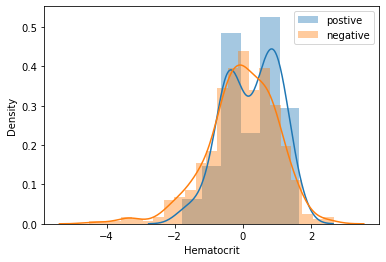

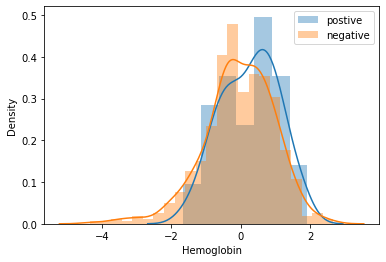

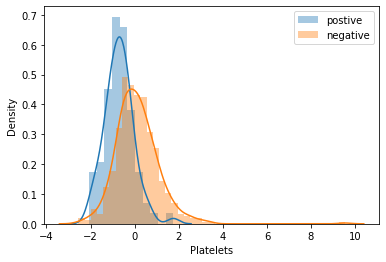

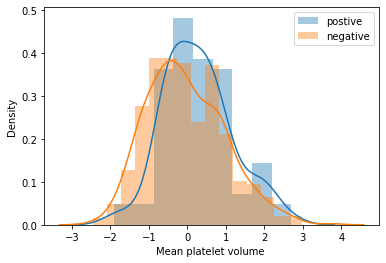

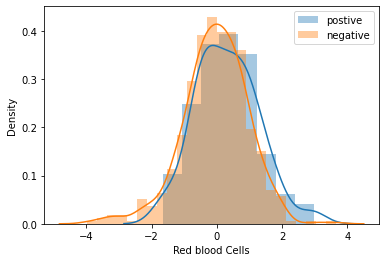

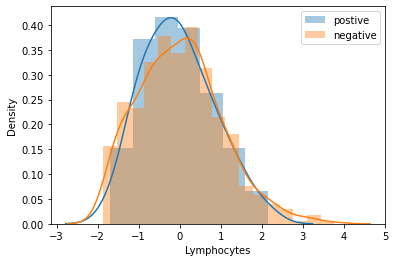

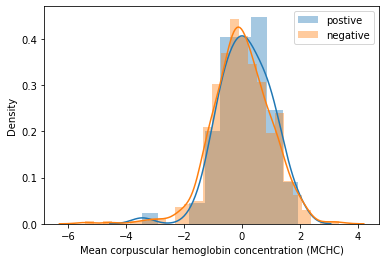

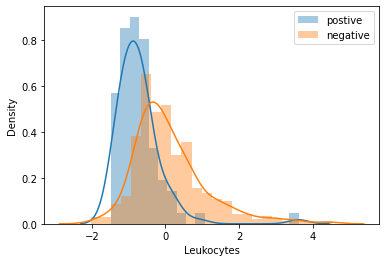

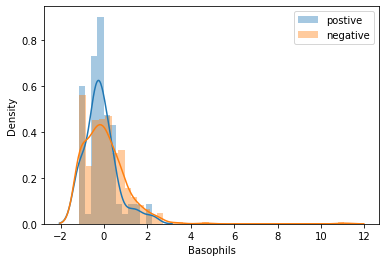

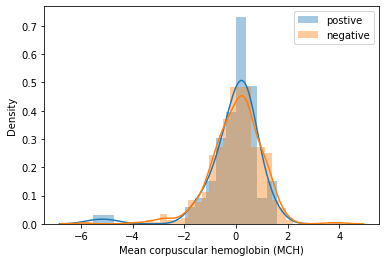

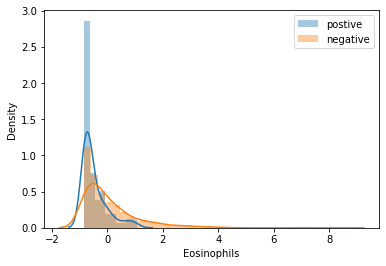

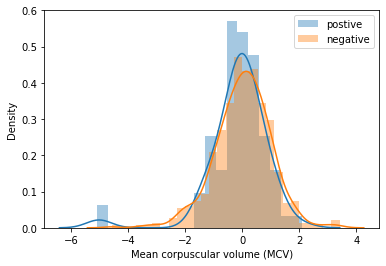

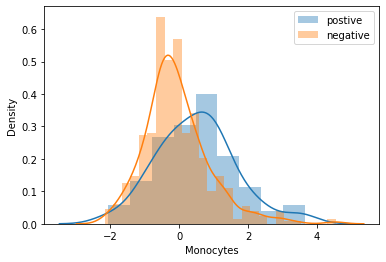

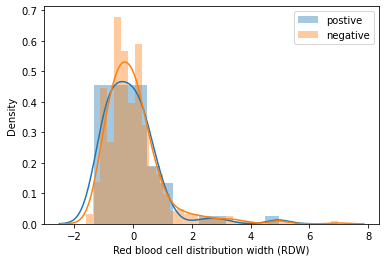

In [441]:
for cat1_column in cat1_columns:
    plt.figure()
    sns.distplot(ds_covid_positive[cat1_column], label='postive')
    sns.distplot(ds_covid_negative[cat1_column], label='negative')
    plt.legend()

**Remarque:**

*'Platelets'*, *'Leukocytes'* et *'Monocytes'* affectent de maniére remarquable le resultat du test du corona (variable Target). -> hypothése a testé

**Relation Age/Target**

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

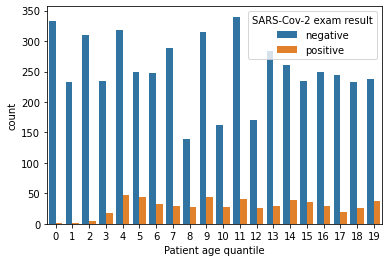

In [442]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=ds_covid)

Remarque:
Selon Le Graphique les mineurs ont une probablité d'etre infécté au corona virus moins que les adults.

**Relation Cat2/Target**

les heatmap sont les graphes idéal pour illustré la relation entre *'les variables qualitatives'* et la *'variable target'*.

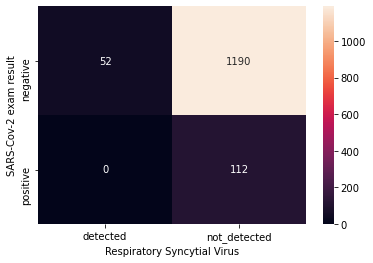

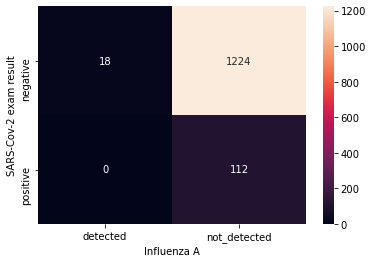

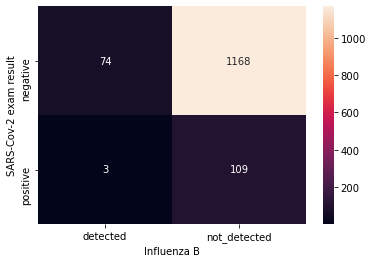

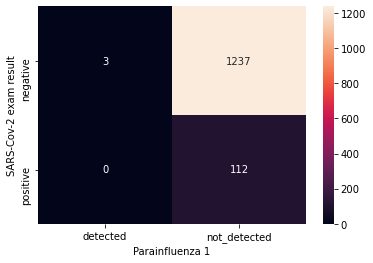

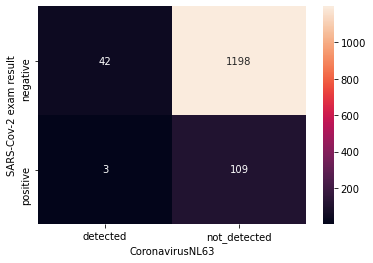

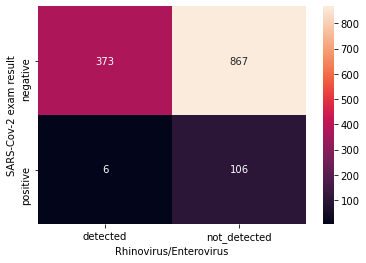

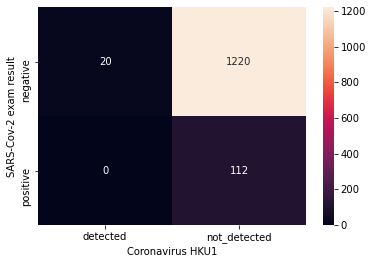

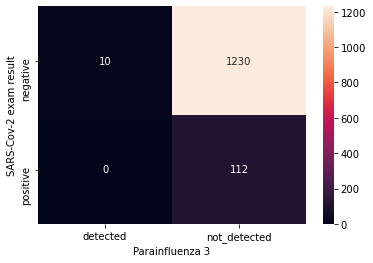

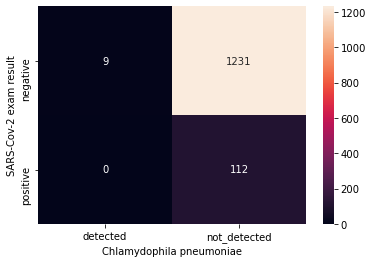

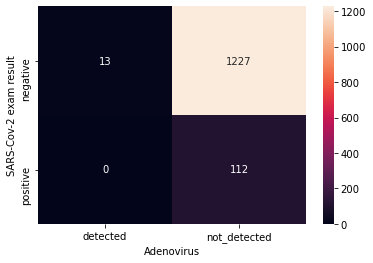

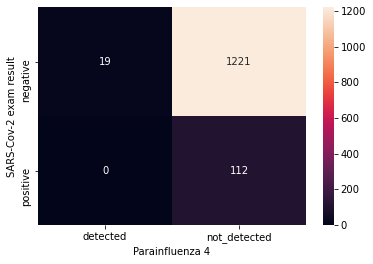

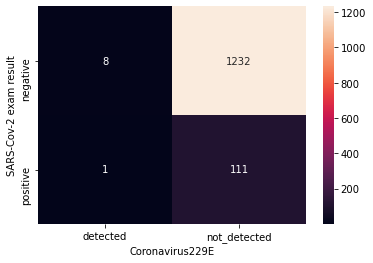

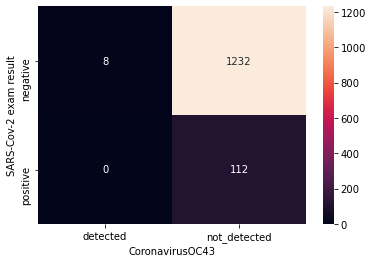

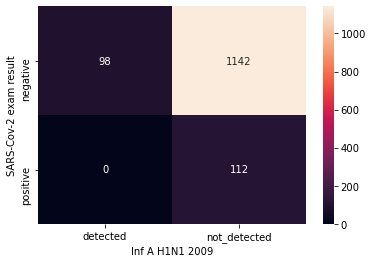

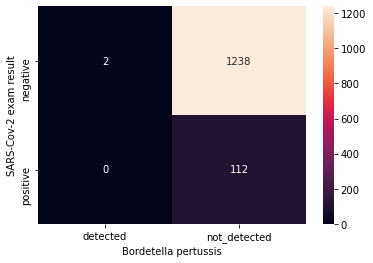

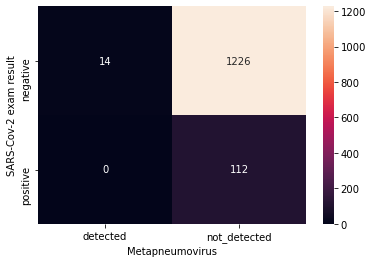

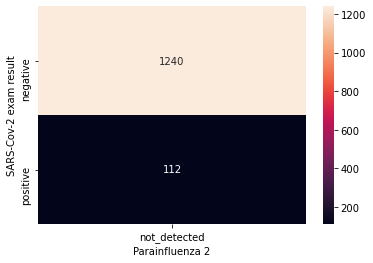

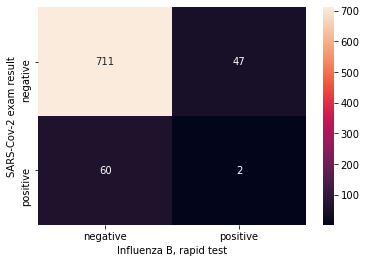

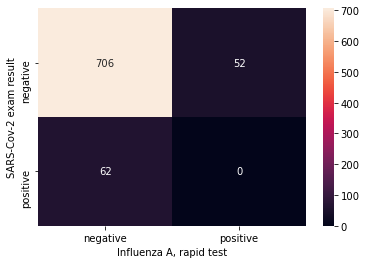

In [443]:
for cat2_column in cat2_columns:
    plt.figure()
    sns.heatmap( pd.crosstab( ds_covid['SARS-Cov-2 exam result'], ds_covid[cat2_column] ), annot=True, fmt='d')

Hypothèses a tester:
- La variable *'Rhinovirus/Enterovirus'* est relié au resultat corona virus.
  
- La variable *'Influenza A, rapid test'* est relié au resultat corona virus ( negative (influenzaA) -- negative (Corona) ) => Après recherche Influenza A n'affecte pas le resultat du corona virus + les test rapid sont peut fiable.

- La variable *'Prainfluenza'* n'affecte en aucun cas le resultat du resulat corona.

**Conclustion Finale (Variable / Target):**

On a peut de variable qui peuvent prevoirent la contaminsation de coronavirus. Mais on va esseyer quand meme de finaliser le projet.


### Analyse plus Détaillée:
**Relation Variable / Variable**

*Cat1/Cat1*

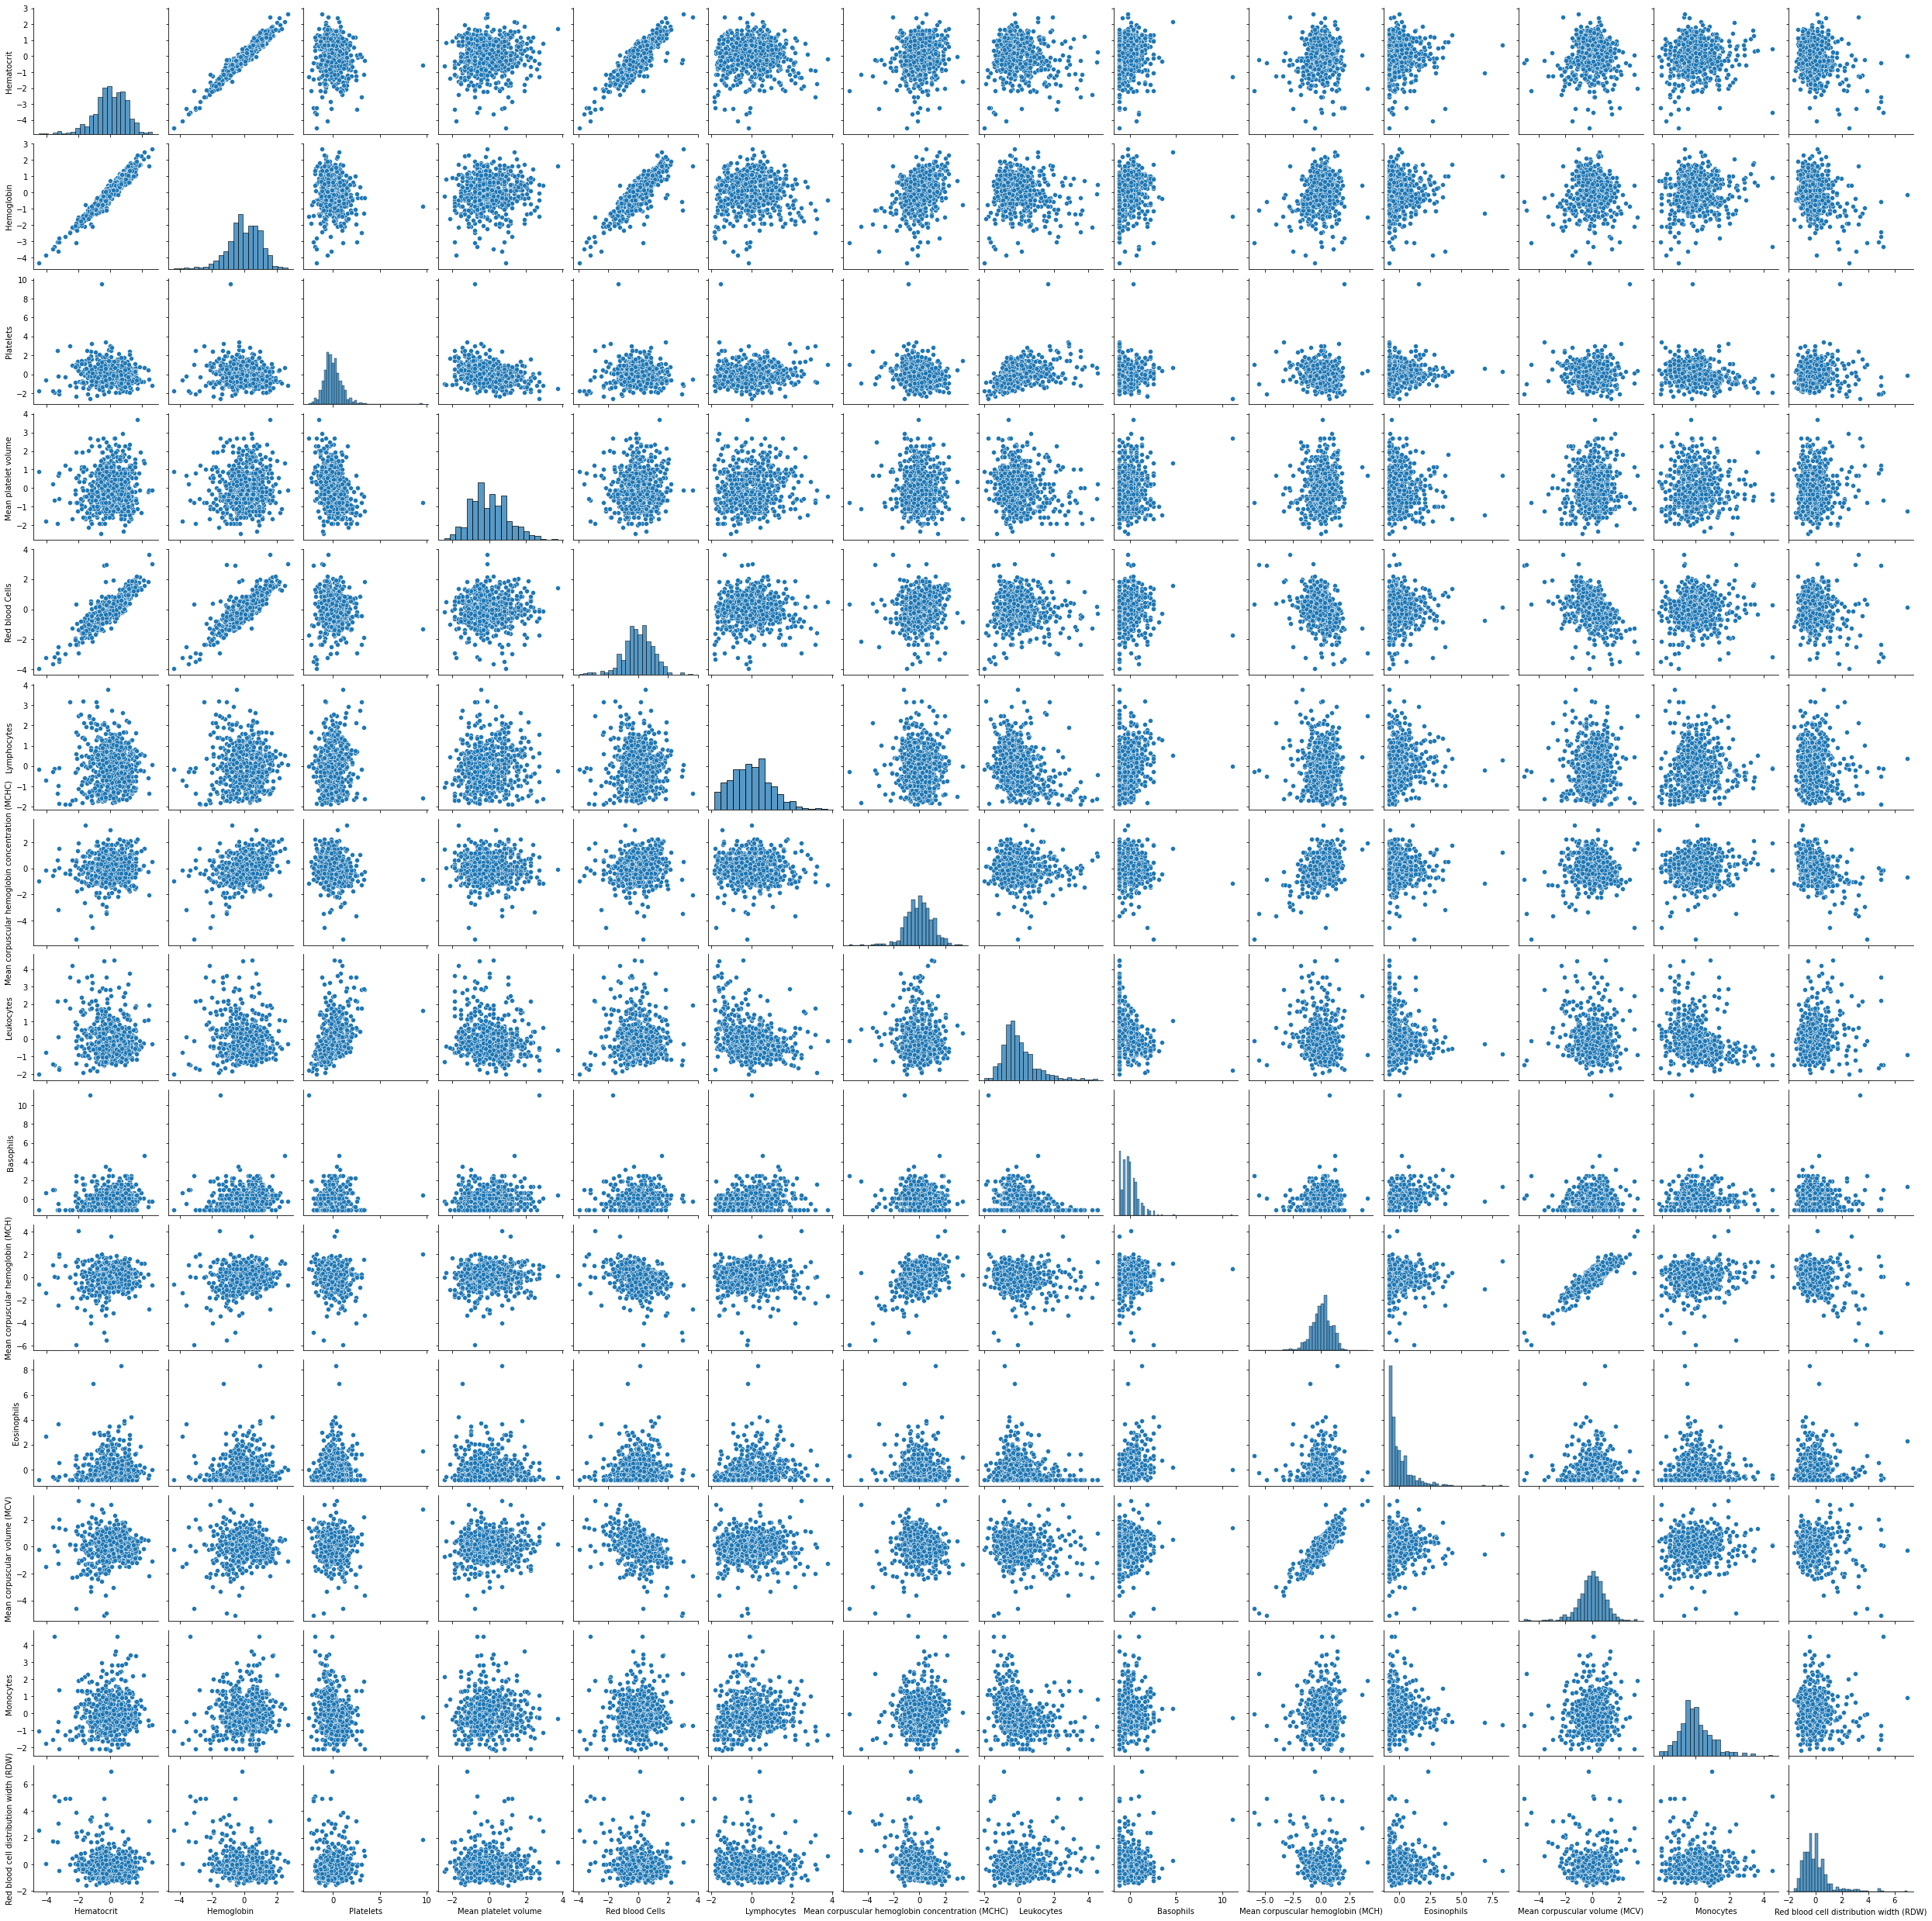

In [444]:
#Representation du nuage de points
sns.pairplot(ds_covid[cat1_columns]) 

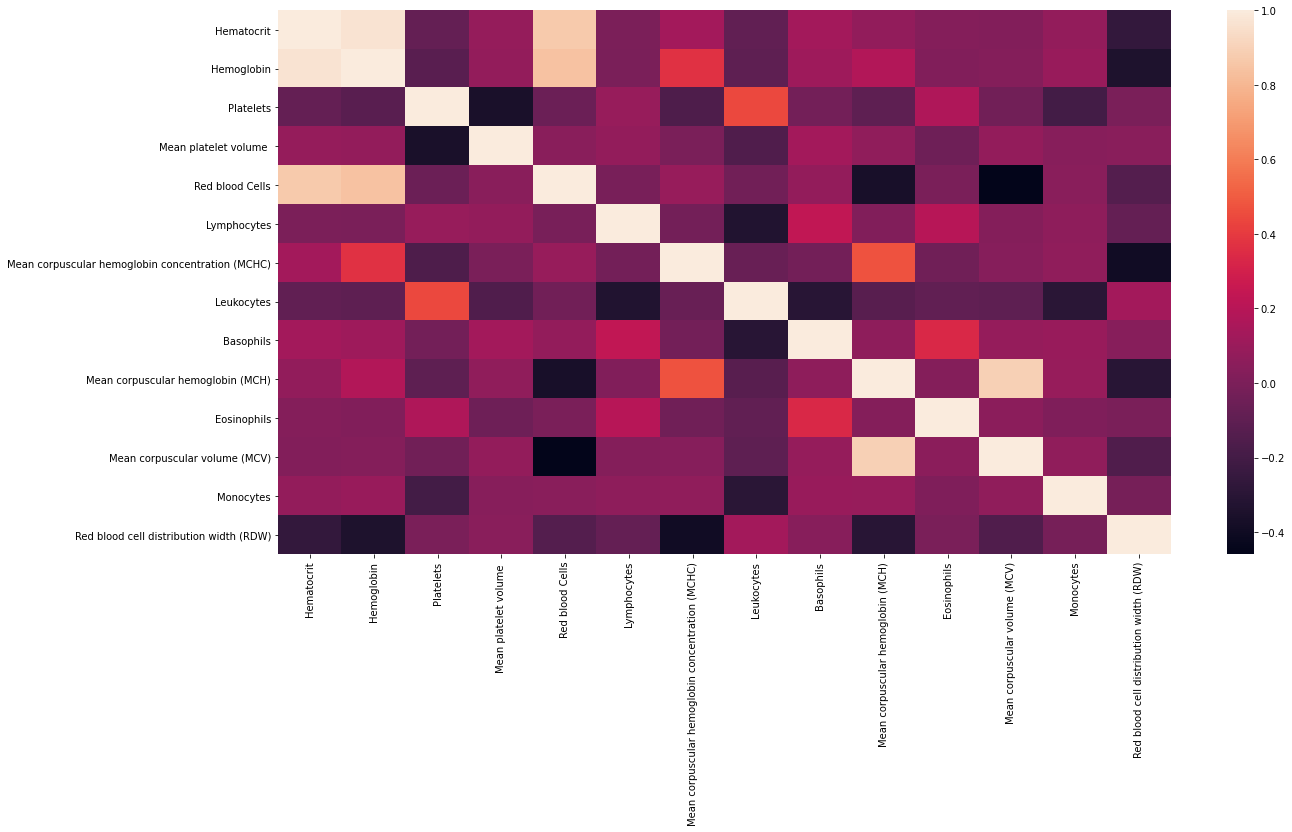

In [445]:
#Representation d'une heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(ds_covid[cat1_columns].corr())
plt.show()

<Figure size 1440x720 with 0 Axes>

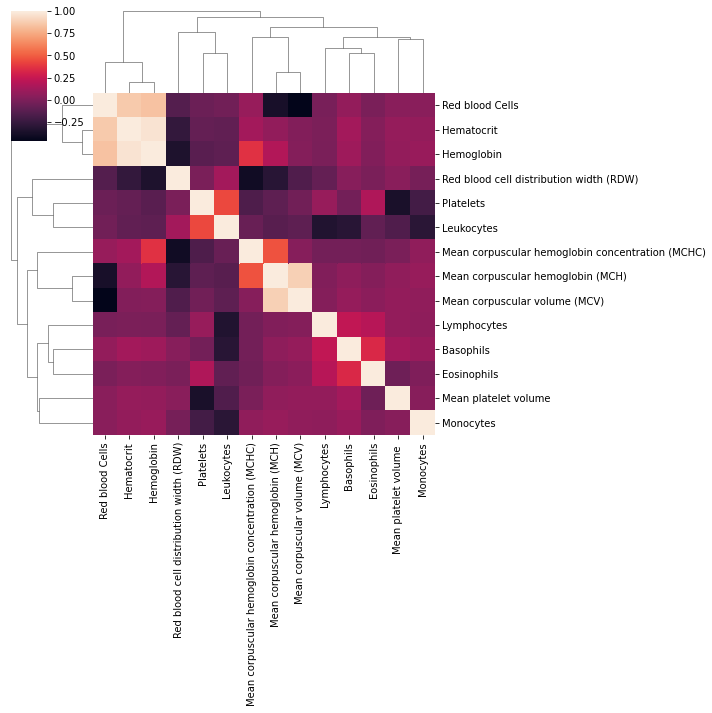

In [446]:
plt.figure(figsize=(20, 10))
sns.clustermap(ds_covid[cat1_columns].corr())

**Conclusion:**
ilya certain variable qui sont très correle (> 90%)

*Cat1/Age*

<ipython-input-447-7d6c1ff61e0f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

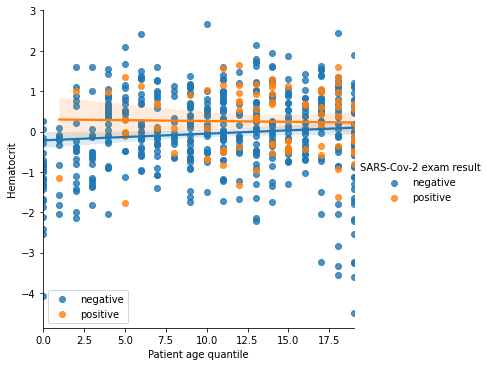

<Figure size 432x288 with 0 Axes>

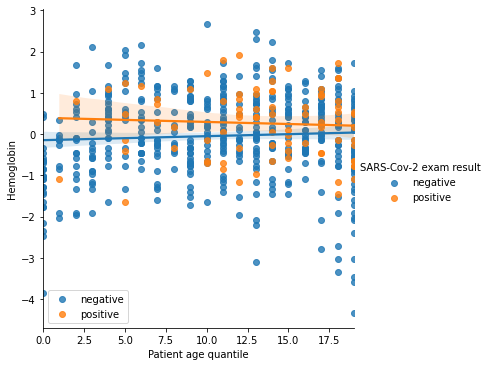

<Figure size 432x288 with 0 Axes>

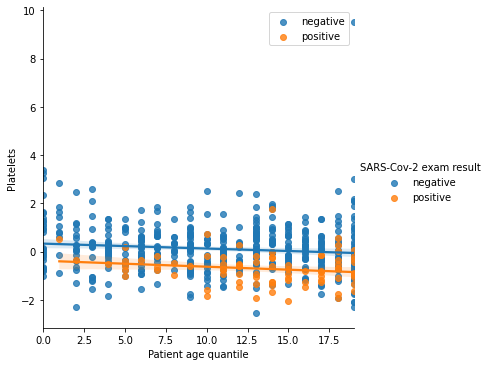

<Figure size 432x288 with 0 Axes>

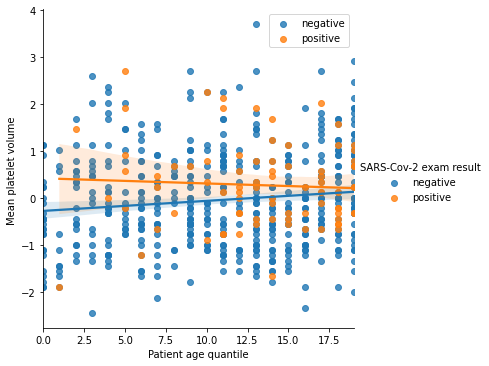

<Figure size 432x288 with 0 Axes>

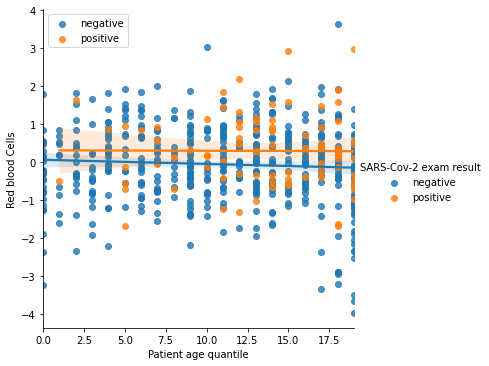

<Figure size 432x288 with 0 Axes>

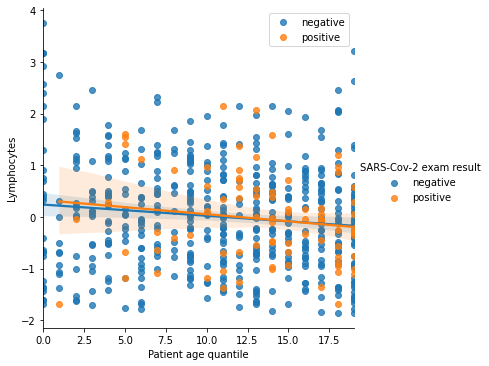

<Figure size 432x288 with 0 Axes>

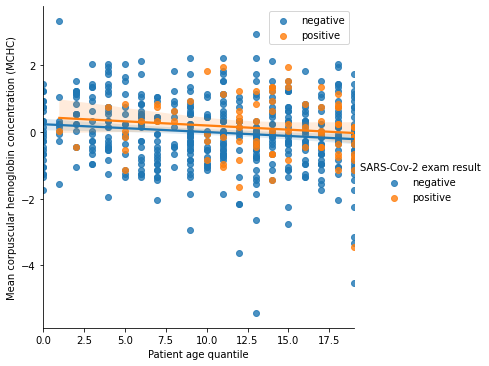

<Figure size 432x288 with 0 Axes>

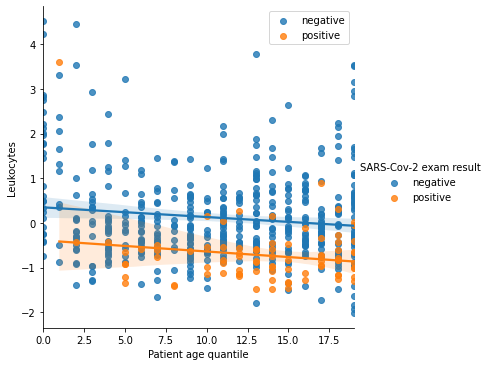

<Figure size 432x288 with 0 Axes>

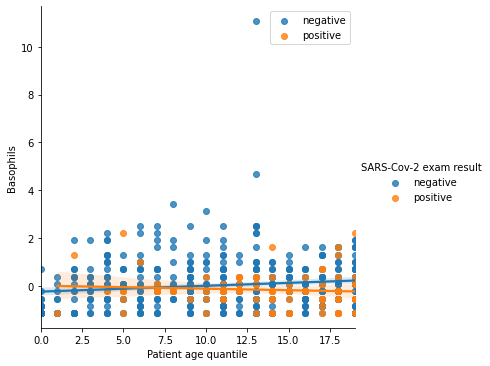

<Figure size 432x288 with 0 Axes>

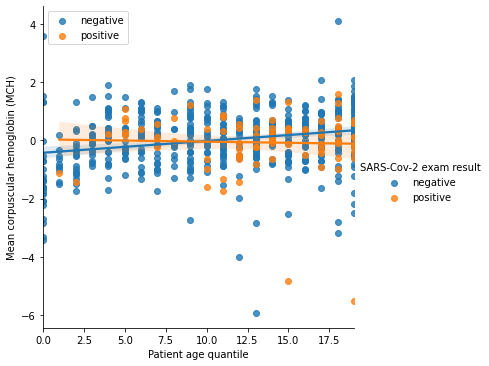

<Figure size 432x288 with 0 Axes>

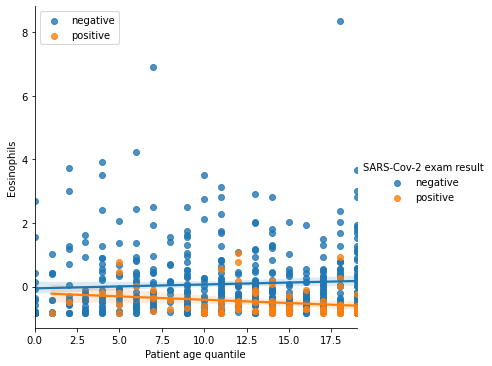

<Figure size 432x288 with 0 Axes>

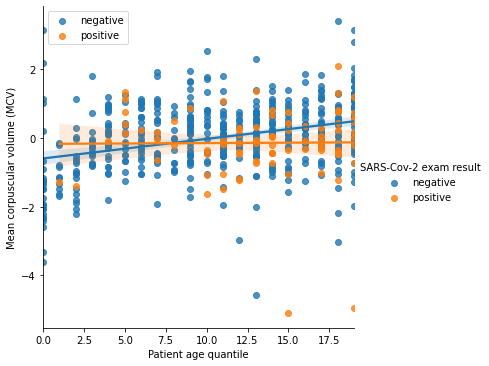

<Figure size 432x288 with 0 Axes>

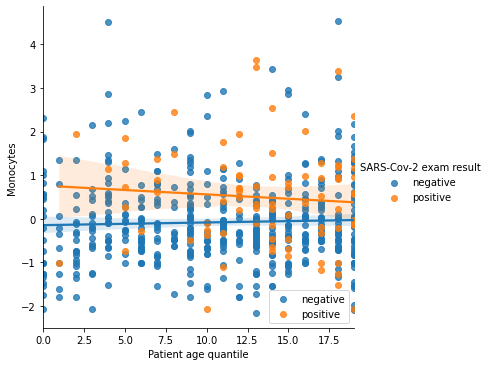

<Figure size 432x288 with 0 Axes>

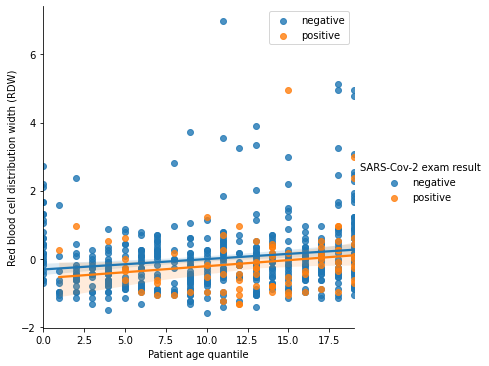

In [447]:
for cat1_column in cat1_columns:
    plt.figure()
    sns.lmplot(x = 'Patient age quantile', y = cat1_column, hue = 'SARS-Cov-2 exam result', data = ds_covid)
    plt.legend()

In [448]:
#corrélation de la variable Age avec les autres variables.
ds_covid.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

On remarque qu'il ya une corrélation entre (MCV) et l'age (mais elle est faible). => Donc on ne peut pas dire que l'age et la cat1 on une corélation.

### Relation Autre Maladie / Cat1
On va esseyer de savoir est ce qu'il ya une relation entre les maladies et Cat1

In [449]:
ds_covid['other disease'] = ( np.sum(ds_covid[cat1_columns] == 'detected', axis=1) >= 1 )
ds_covid.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [450]:
ds_covid['other disease'].shape

(5644,)

In [451]:
ds_covid_is_sick = ds_covid[ds_covid['other disease']==True]
ds_covid_not_sick = ds_covid[ds_covid['other disease']==False]

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


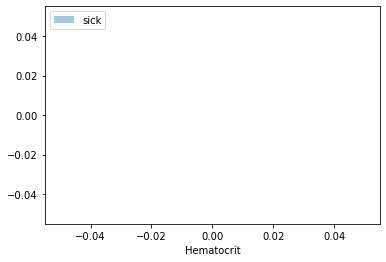

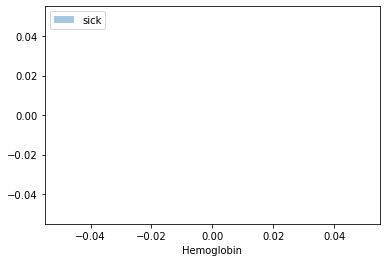

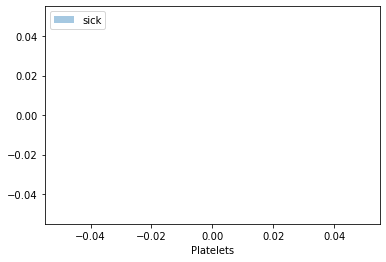

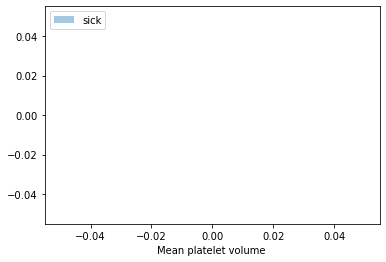

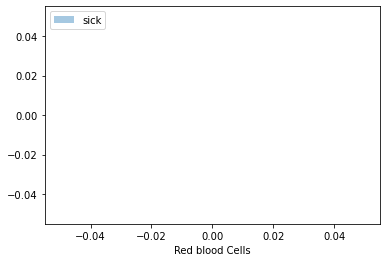

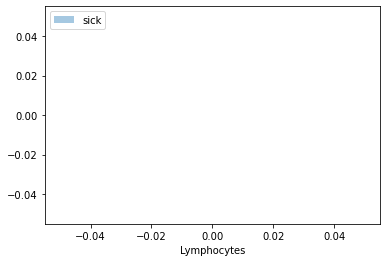

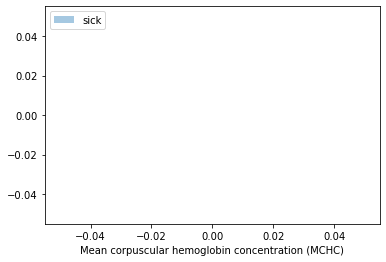

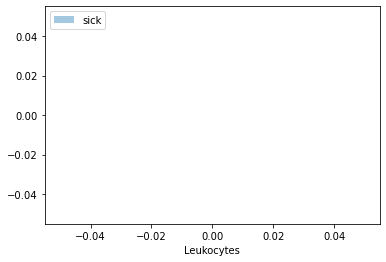

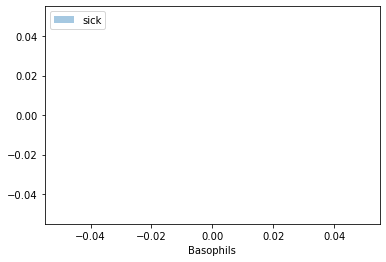

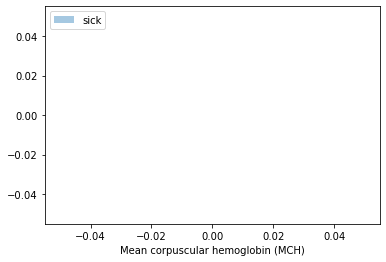

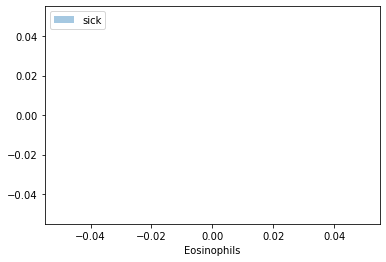

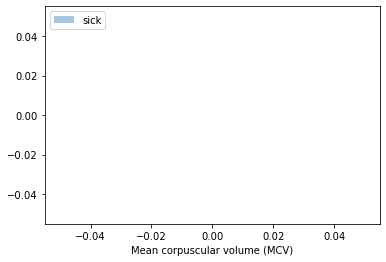

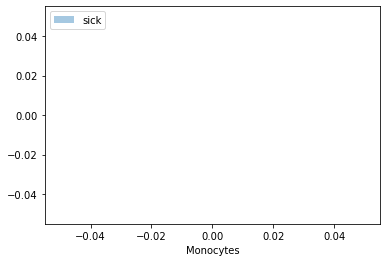

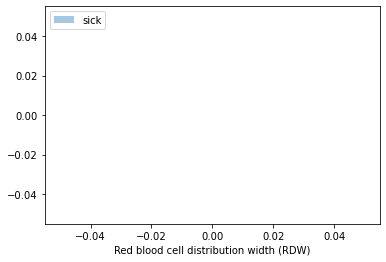

In [452]:
for cat1_column in cat1_columns:
    plt.figure()
    sns.distplot(ds_covid_is_sick[cat1_column], label="sick")
    #sns.distplot(ds_covid_not_sick[cat1_column], label="not sick")
    plt.legend()

### Valeur Manquante :(Trouvé une solution)

1. Les supprimers :

In [453]:
ds_covid.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

99 (99, 38) => On pert énormement de données.

2. Utilisé seulement la catégorie 1 Ou Seulement La Catégorie 2 ?

In [454]:
ds_covid[cat1_columns].count()
#ds_covid[cat1_columns].shape

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [455]:
ds_covid[cat2_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

=> Les deux catégorie contient des informations intéressantes.

## 9.3 Préprocessing
### 9.3.1 Prétraitement De Base

**Mettre Les Données Dans <u> Un Format propice </u> Pour Le Machine Learning**
- Création de TrainSet et TestSet.
- Elimination de Nan.
- Encodage.
  
**Améliorer Les <u>Performances</u> Du Modèle**
- Identification des outliers. - apres création d'un modèle.
- Features Selection - eliminé les variables var=0 / redendante.
- Features Engineering - création de variable cpa/ polynomiale features.
- Features Scaling - Normalisatin des données.

![](src/imgs/Processus.png)

![](src/imgs/process-details.png)

In [456]:
ds_covid1=ds_covid_origin.copy()
ds_covid1.head(10)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   
5         NaN        NaN                    NaN              NaN          NaN   
6         NaN        NaN                    NaN              NaN          NaN   
7         NaN        NaN                    NaN              NaN          NaN   
8   -0.774212   1.429667              -1.672222        -0.850035    -0.005738   
9         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                           

In [457]:
missing_rate=ds_covid1.isna().sum()/ds_covid1.shape[0]
#0.9 - 0.88, 0.80 - 0.75
cat1_columns = list(ds_covid1.columns[(missing_rate > 0.88) & (missing_rate < 0.90)])
cat2_columns = list(ds_covid1.columns[(missing_rate > 0.75) & (missing_rate < 0.80)])

In [458]:
add_columns = ['Patient age quantile', 'SARS-Cov-2 exam result'] 
columns = add_columns + cat1_columns + cat2_columns
ds_covid1 = ds_covid1[columns]
ds_covid1.head(10)

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515   -0.022340   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   
5                     9               negative         NaN         NaN   
6                    13               negative         NaN         NaN   
7                    16               negative         NaN         NaN   
8                     1               negative   -1.571682   -0.774212   
9                    17               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   
5        NaN                    NaN              NaN          NaN   
6        NaN                    NaN              NaN          NaN   
7        NaN                    NaN              NaN          NaN   
8   1.429667              -1.672222        -0.850035    -0.005738   
9        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   
5                                               NaN         NaN        NaN   
6                                               NaN         NaN        NaN   
7                                               NaN         NaN        NaN   
8                                          3.331071     0.36455  -0.223767   
9                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   
5                                NaN          NaN   
6                                NaN          NaN   
7                                NaN          NaN   
8                           0.178175     1.018625   
9                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   
5                            NaN        NaN   
6                            NaN        NaN   
7                            NaN        NaN   
8                      -1.336024   0.068652   
9                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   
5                      

**Split, Netoyage, Encodage**

In [459]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ds_covid1, test_size=0.2, random_state=4)

In [460]:
train_set['SARS-Cov-2 exam result'].value_counts()

negative    4077
positive     438
Name: SARS-Cov-2 exam result, dtype: int64

In [461]:
test_set['SARS-Cov-2 exam result'].value_counts()

negative    1009
positive     120
Name: SARS-Cov-2 exam result, dtype: int64

In [476]:
def preprocessing(dataset, mode):
    #Encodage
    dataset = encoding(dataset)
    #Imputation
    dataset = imputation(dataset, mode)
    #Features, Target
    X = dataset.drop('SARS-Cov-2 exam result', axis=1)
    y = dataset['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X, y
    

def encoding(dataset):
    encodage = {
        'positive':1,
        'negative':0,
        'detected':1,
        'not_detected':0
    }
    for column in dataset.select_dtypes('object').columns:
        dataset[column] = dataset[column].map(encodage)
    return dataset

def imputation(dataset, mode):
    #Delete Line with Nan value
    if mode == 'dropna':
        return dataset.dropna(axis=0)
    elif mode == 'fillna':
        return dataset.fillna(-999)
    elif mode == 'variabes_selection':
        return



In [477]:
X_train, y_train = preprocessing(train_set)
X_test, y_test = preprocessing(test_set)

0    247
1     42
Name: SARS-Cov-2 exam result, dtype: int64
0    65
1     8
Name: SARS-Cov-2 exam result, dtype: int64


## 9.4 Moddeling

- Définir une fonction d'évaluation.
- Entrainement des différents modéles.
- Optimisation avec GridSearchCV.
- Analyse des erreurs et retour au preprocessing / EDA.
- Learning curve et prise de décision.

In [478]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

In [479]:
model = DecisionTreeClassifier(random_state=0)

In [484]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_prec = model.predict(X_test)

    #log
    print(confusion_matrix(y_test, y_prec))
    print(classification_report(y_test, y_prec))

    #learning curve
    return learning_curve(model, X_train, y_train, cv= 4, scoring='f1', train_sizes = np.linspace(0.2, 1, 10))


[[57  8]
 [ 6  2]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        65
           1       0.20      0.25      0.22         8

    accuracy                           0.81        73
   macro avg       0.55      0.56      0.56        73
weighted avg       0.83      0.81      0.82        73



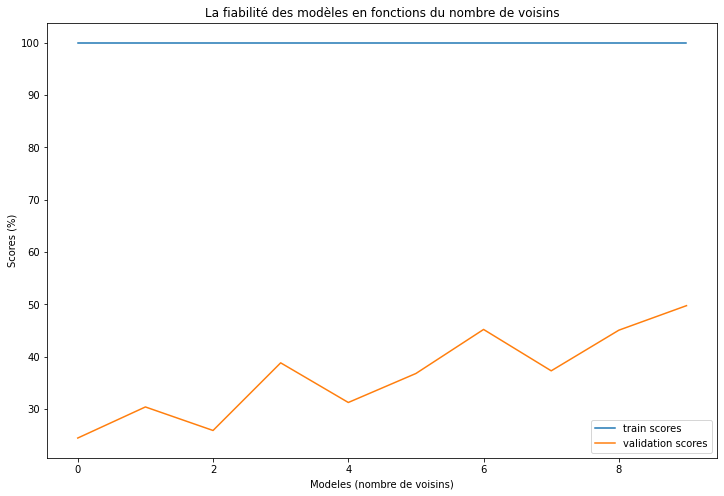

In [485]:
pourc, train_score, val_score = evaluate(model, X_train, y_train, X_test, y_test)
val_score.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(train_score.mean(axis=1)*100, label='train scores')
plt.plot(val_score.mean(axis=1)*100, label='validation scores')
plt.xlabel("Modeles (nombre de voisins)")
plt.ylabel("Scores (%)")
plt.title("La fiabilité des modèles en fonctions du nombre de voisins")
plt.legend()
plt.show()

POSITIVE AU CORONA.

|          | Recall (N) |  Recall (P)  |    
| :-------:| :----: |:-----:|
|Precision (N)|  **TN**    |  FN   | 
|      Precision (P)        |  FP    |   **TP** |

- TP: en vrai c'est positif, le modèle la bien predit.
- FP: en vrai c'est positif, le modèle c'est trompé.
- TN: en vrai c'est negatif, le modèle la bien predit.
- FN: en vrai c'est negatif, le modèle c'est trompé.


On remarque que notre modèle est en overfiting (surapprentissage) c'est a dire il a apprit parfaitement et au moment de la validation il n'a pas réussi.

On conclu que les données d'apprentissages sont très peut.

ce qui nous reste a faire est de ne pas supprimé tout les lignes qui conntiennt des données manquantes mais de les traité avec les transformers afin d'obtenir des meilleurs résultat